### DO TITANIC AND HOUSE OF REPRESENTATIVES AND MOVIE DATASETS AND COLLEGE ANALYSIS

In [ ]:
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
path = '~/seaborn-data/titanic.csv'
df = pd.read_csv(path)
df.sample(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
782,0,1,male,29.0,0,0,30.0,S,First,man,True,D,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [4]:
df.age.fillna(df.age.mean(), inplace=True)
cols = ['pclass']
y, X = dmatrices('survived~ pclass +age+sibsp+parch+fare',
                 data=df,return_type='dataframe')
y = y['survived']

X.sample(2)

,Intercept,pclass,age,sibsp,parch,fare
198,1.0,3.0,29.699118,0.0,0.0,7.750
350,1.0,3.0,23.000000,0.0,0.0,9.225


In [11]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm, classes=[0, 1], title='some confusion matrix',
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center", size=20,
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def plot_roc(ytrue, yproba, title='some ROC curve'):
    auc = roc_auc_score(ytrue, yproba)
    fpr, tpr, thr = roc_curve(ytrue, yproba)
    plt.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=.4)
    plt.plot(fpr, tpr, label='auc={:.2f}%'.format(auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

    
def plot_prcurve(ytrue, yproba, title='some Precision-Recall curve'):
    auc = average_precision_score(ytrue, yproba)
    precision, recall, thr = precision_recall_curve(ytrue, yproba)
    plt.plot(recall, precision, label='auc={:.2f}%'.format(auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)


def train_test(clf, x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size=0.25, random_state=1234)
    clf.fit(xtrain, ytrain)
    # accuracy for test & train:    
    y_pred = clf.predict(xtest)
    y_proba = clf.predict_proba(xtest)[:, 1]
    clf_report = classification_report(ytest, y_pred)
    print(clf_report)
    conf = confusion_matrix(ytest, y_pred)
    return conf, ytest, y_proba

             precision    recall  f1-score   support

        0.0       0.66      0.87      0.75       132
        1.0       0.66      0.36      0.47        91

avg / total       0.66      0.66      0.64       223



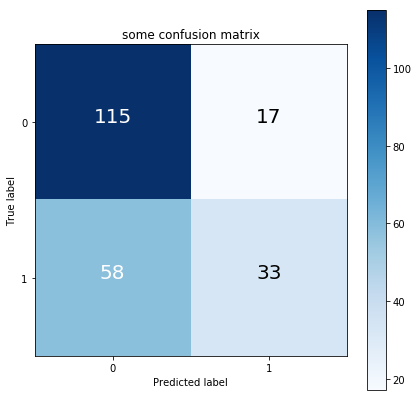

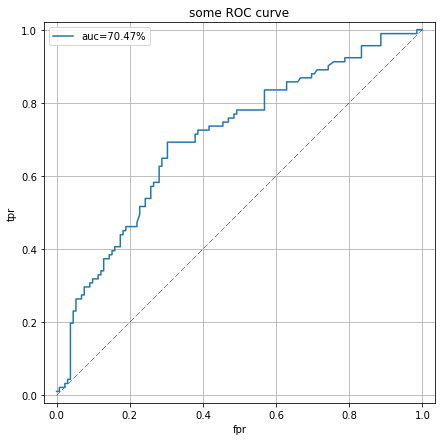

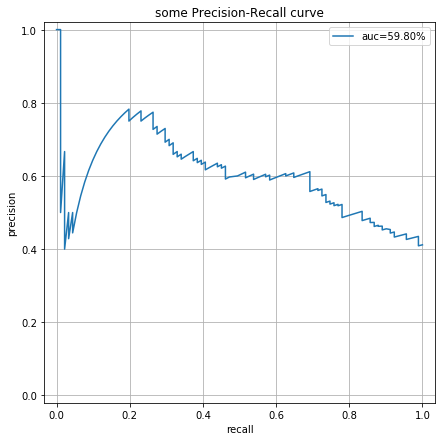

In [12]:
log_clf = LogisticRegression()
conf, y_true, y_proba = train_test(log_clf, X, y)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(conf)

plt.figure(figsize=(7, 7))
plot_roc(y_true, y_proba)

plt.figure(figsize=(7, 7))
plot_prcurve(y_true, y_proba)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from datetime import datetime

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve

### HOUSE OF REP

In [9]:
df = pd.read_csv('data/house-votes-84.data', header = None)
df.rename(columns={0: 'party'}, inplace = True)
df.replace(to_replace = 'y', value = 1, inplace = True)
df.replace(to_replace = 'n', value = 0, inplace = True)
df.replace(to_replace = '?', value = np.nan, inplace = True)
for column in df.columns.values:
    if column != 'party':
        df[column].replace(to_replace = np.nan, value = stats.mode(df[column].dropna())[0][0], inplace = True)

X = df.copy(deep = True)
del X['party']
y = X.pop(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
logregcv = LogisticRegressionCV(cv=3, random_state=4444) # 3 different 
logregcv.fit(X_train,y_train)
acc_test_log = logregcv.score(X_test, y_test)

print('test accuracy', acc_test_log)
print(classification_report(y_test, logregcv.predict(X_test)))


test accuracy 0.6641221374045801
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71        71
         1.0       0.65      0.57      0.61        60

   micro avg       0.66      0.66      0.66       131
   macro avg       0.66      0.66      0.66       131
weighted avg       0.66      0.66      0.66       131



AUC 0.7177230046948356


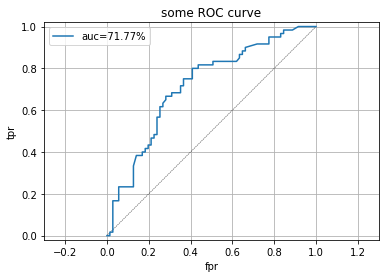

In [10]:
def plot_roc(ytrue, yproba, title='some ROC curve'):
    auc = roc_auc_score(ytrue, yproba)
    fpr, tpr, thr = roc_curve(ytrue, yproba)
    plt.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=.4)
    plt.plot(fpr, tpr, label='auc={:.2f}%'.format(auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

y_proba = logregcv.predict_proba(X_test)[:, 1]
print('AUC', roc_auc_score(y_test, y_proba))
plot_roc(y_test, y_proba)

### MOVIE

In [11]:
df = pd.read_csv('data/2013_movies.csv')
df['Budget'].fillna(np.mean(df['Budget'].dropna()), inplace = True)
df['ReleaseDate'] =  pd.to_datetime(df['ReleaseDate'], format='%Y-%m-%d %H:%M:%S')
df['month'] = df['ReleaseDate'].dt.strftime('%m')
df['month'] = df['month'].astype('int')
df.replace(to_replace = 'G', value = 'PG-13', inplace = True)
X = df[['Budget', 'DomesticTotalGross', 'Runtime', 'month']]
y = df['Rating']

scores = cross_val_score(LogisticRegressionCV(), X, y, cv=5, scoring='accuracy')
print('accuracy', np.mean(scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARN

accuracy 0.5185714285714286


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
